## IPL WINNING TEAM PREDICTION

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

In [20]:
match=pd.read_csv("/home/rgukt/Desktop/datascience/iplDatasets/matches.csv")
match            

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [21]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## DATA CLEANING AND ANANLYSIS

In [52]:
match.describe()

,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000
mean,0.025572,13.460296,3.375505
std,0.157961,23.626205,3.393397
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000
75%,0.000000,19.000000,6.000000
max,1.000000,146.000000,10.000000


In [23]:
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [53]:
match.info

<bound method DataFrame.info of                       team1                        team2   
0       Sunrisers Hyderabad  Royal Challengers Bangalore  \
1            Mumbai Indians       Rising Pune Supergiant   
2             Gujarat Lions        Kolkata Knight Riders   
3    Rising Pune Supergiant              Kings XI Punjab   
5             Gujarat Lions          Sunrisers Hyderabad   
..                      ...                          ...   
750     Chennai Super Kings              Kings XI Punjab   
751   Kolkata Knight Riders               Mumbai Indians   
752     Chennai Super Kings               Mumbai Indians   
754          Delhi Capitals          Chennai Super Kings   
755          Mumbai Indians          Chennai Super Kings   

                     toss_winner toss_decision  result  dl_applied   
0    Royal Challengers Bangalore         field  normal           0  \
1         Rising Pune Supergiant         field  normal           0   
2          Kolkata Knight Riders     

In [24]:
match=match.iloc[:,:-1]
match.dropna(inplace=True)

In [25]:
match["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [1]:
#for Delhi Capitals
match['team1']=match['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match['team2']=match['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match['winner']=match['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
match['team1']=match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match['team2']=match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match['winner']=match['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

NameError: name 'match' is not defined

## DATA VISUALIZATIONS

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

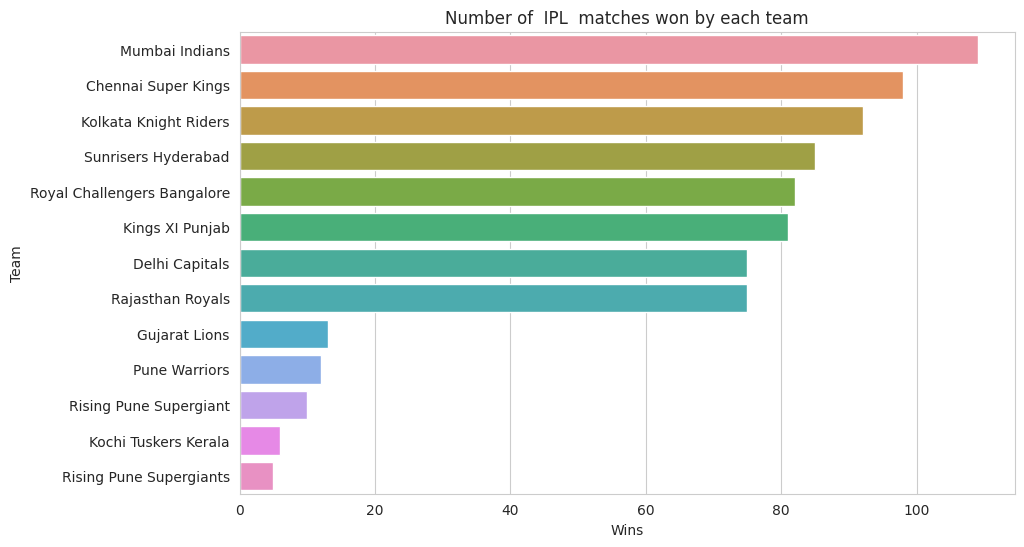

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = match,order= match['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

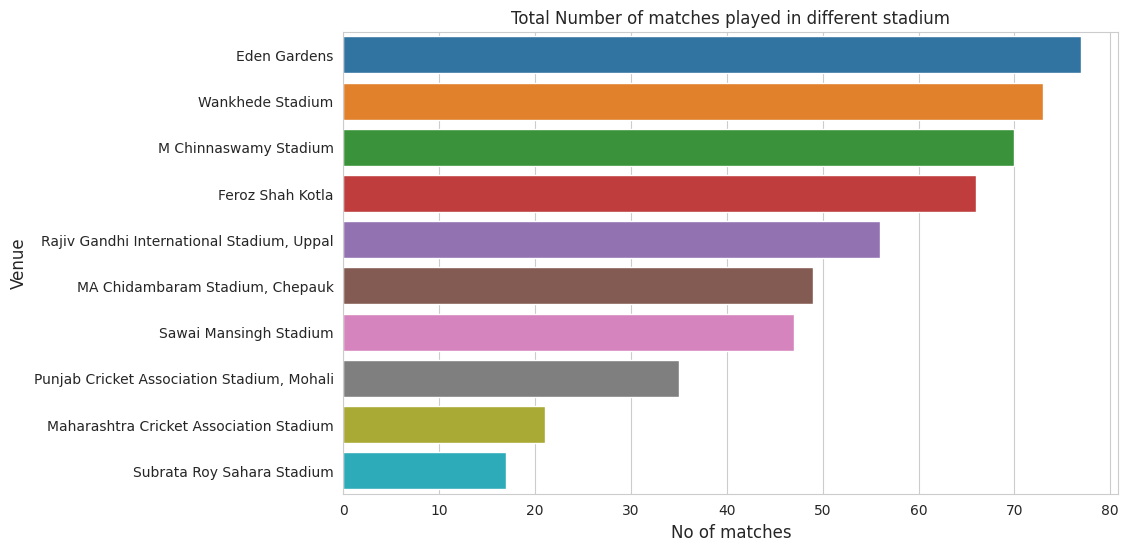

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data =match,order = match['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

<Axes: xlabel='result', ylabel='win_by_runs'>

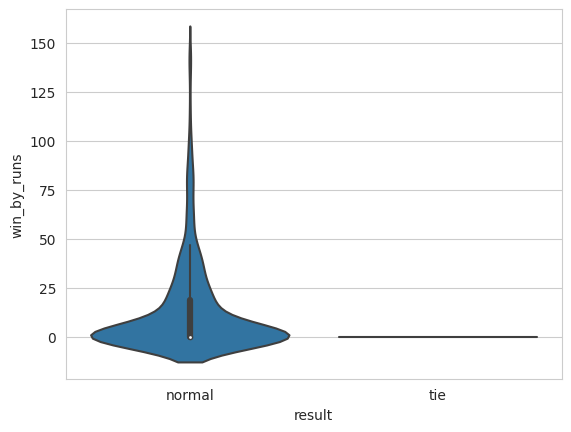

In [49]:
import seaborn as sns
sns.violinplot(x='result',y='win_by_runs',data=match,size=6)

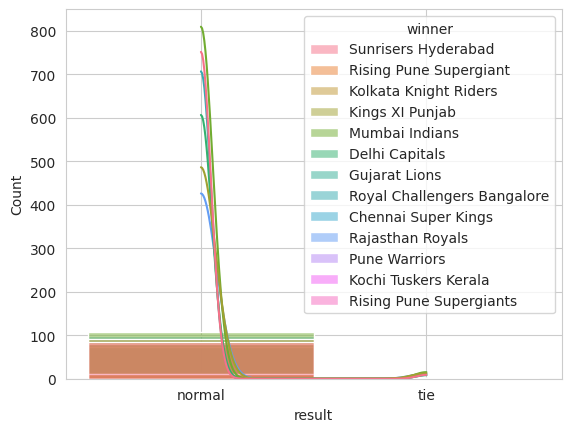

In [50]:
import seaborn as sns
sns.histplot(x='result',data=match,kde=True,hue='winner')
plt.show()

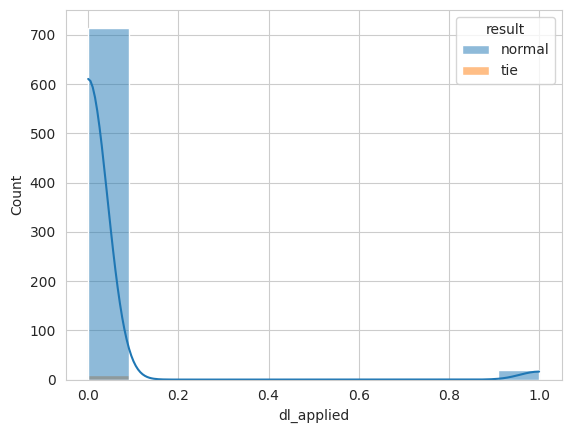

In [51]:
import seaborn as sns
sns.histplot(x='dl_applied',data=match,kde=True,hue='result')
plt.show()

Text(0.5, 1.0, 'Toss Decision')

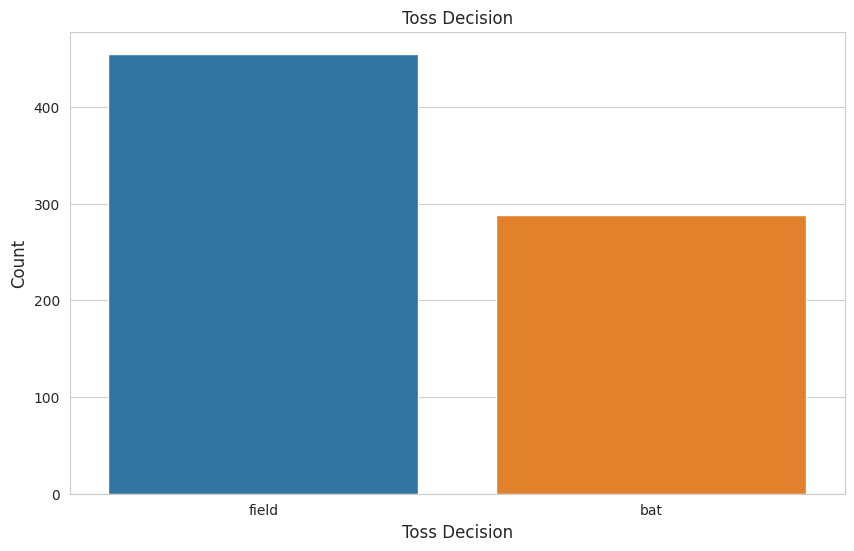

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=match)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [30]:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(match[i].unique())
  print(match[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
city
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur 

In [31]:
match.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [32]:
X = match.drop(["winner"], axis=1)
y = match["winner"]


In [33]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

# TRAINING AND SPLITING THE DATA

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

### RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=10)

In [44]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features =10)

In [45]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=10, min_samples_split=3, n_estimators=200)

In [54]:
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)
ac

0.9060402684563759